# Matplotlib　基本編

対応する動画：[Pythonでグラフ作成　Matplotlib　応用編【研究で使うPython #68】](https://youtu.be/YQyaDp-CNfw)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## ライブラリの読み込み

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 目次 
1. Matplotlibを使ってグラフを作成
2. 作ったグラフが他人に理解されやすくなるよう形式を整える

## 基本的なグラフの作り方

### データの用意

- 新型コロナウイルスの感染者データ
- [厚生労働省のオープンデータのページ](https://www.mhlw.go.jp/stf/covid-19/open-data.html)から**○新規陽性者数の推移（日別）**と**○重症者数の推移**というcsv形式の2つのデータをダウンロード

In [2]:
case_df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)   # 新規感染者数のデータ(csv形式)を読み込み
severe_df = pd.read_csv('severe_cases_daily.csv', index_col=0)          # 重症者数のデータ(csv形式)を読み込み

case_all_df = case_df.loc[:,['ALL']].rename(columns={'ALL':'New_Cases'})          # 全国のデータのみ抽出（名前も変更）
severe_all_df = severe_df.loc[:,['ALL']].rename(columns={'ALL':'Severe_Cases'})   # 重症者数でも同様に抽出 & 名前変更

merged_all_df = case_all_df.merge(severe_all_df, on=['Date'])                     # 新規感染者数と重症者数のデータを結合する

In [3]:
merged_all_df

,New_Cases,Severe_Cases
Date,,
2020/5/9,108,267
2020/5/10,66,249
2020/5/11,58,243
2020/5/12,87,259
2020/5/13,55,245
...,...,...
2022/5/12,41657,156
2022/5/13,39582,153
2022/5/14,39339,139


### 折れ線グラフ
`plt.plot(データのリスト or 配列)`でプロットすることが可能

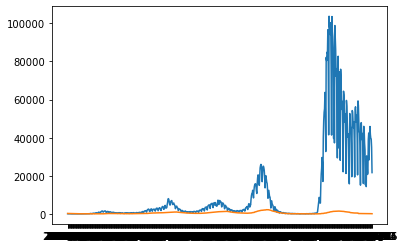

In [4]:
date = merged_all_df.index               # 日付のデータ
case = merged_all_df['New_Cases']        # 新規感染者のデータ
severe = merged_all_df['Severe_Cases']   # 重症者数のデータ

plt.plot(date, case)     # 新規感染者をプロット（青）
plt.plot(date, severe)   # 重症者数をプロット（橙）

In [5]:
case

Date
2020/5/9       108
2020/5/10       66
2020/5/11       58
2020/5/12       87
2020/5/13       55
             ...  
2022/5/12    41657
2022/5/13    39582
2022/5/14    39339
2022/5/15    34895
2022/5/16    21676
Name: New_Cases, Length: 738, dtype: int64

### 棒グラフ
`plt.bar(横軸方向の位置を示すデータ, 棒の高さを示すデータ)`でプロットできる．

<BarContainer object of 47 artists>

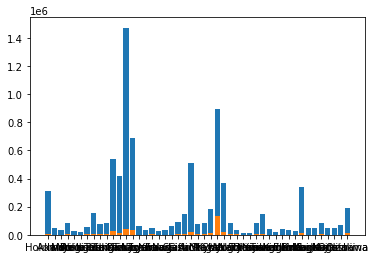

In [6]:
case_pref_df = case_df.loc[:,'Hokkaido':]       # 北海道〜沖縄の各都道府県におけるデータを抽出
severe_pref_df = severe_df.loc[:,'Hokkaido':]   # 上と同じ

prefs = case_pref_df.columns.values   # 都道府県名のラベルを取得
pref_case = case_pref_df.sum()        # 各都道府県において累計新規感染者数を計算
pref_severe = severe_pref_df.sum()    # 同様に累計重症者数を計算

plt.bar(prefs, pref_case)     # 都道府県別の累計新規感染者数をプロット
plt.bar(prefs, pref_severe)   # 同様に累計重症者数を計算

In [7]:
case_pref_df

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020/1/16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/5/12,3176,444,276,475,223,205,560,649,408,362,...,241,281,2424,364,481,649,408,536,767,2330
2022/5/13,3034,373,292,494,233,255,498,645,391,360,...,212,266,2198,309,394,582,353,492,633,2242
2022/5/14,2771,353,261,512,202,284,529,641,397,395,...,212,257,2114,308,415,596,358,550,640,2464


### 散布図
`plt.scatter(横軸方向のデータ, 縦軸方向のデータ)`でプロットできる．

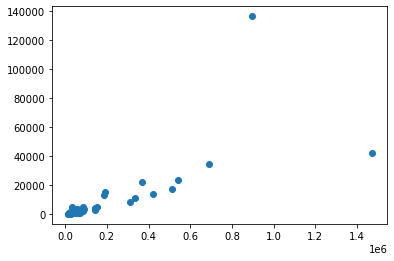

In [8]:
plt.scatter(pref_case, pref_severe)    # 各都道府県における新規感染者数と重症者数の関係性を散布図で可視化

## 形式を整える

上でやったように，Matplotlibを使うと，手軽に折れ線グラフや棒グラフなど多様なグラフを描画することができる．
このことは実験の結果をすぐ確認しようとするときにはとても便利である．

一方で，グラフを他人に見せて説明しようとする場合，単純に`plt.plot()`や`plt.bar()`を使うだけでは，グラフとして必要な形式を満たすことができない．以下の図を見てもらいたい．

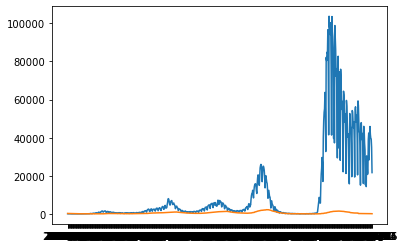

In [9]:
# plt.plot()を使って折れ線グラフを表示

plt.plot(date, case)
plt.plot(date, severe)

これを人が見て理解しやすい形式に整える際，例えば以下の点を改善する必要が出てくる：
* 横軸，縦軸にラベルがないため，それぞれが何を示しているか分からない
* 特に横軸についた目盛りが重なって読めない
* 複数のデータを同時に表すため，色分けした複数の線を使ったが，どの線がどのデータに対応するかパッと見て分からない

基本編では，こういった情報をグラフに含ませるためのやり方を示し，なるべく簡単に最低限の形式を整えられるようになることを目的とする．

なお，以降では折れ線グラフを使って説明するが，棒グラフや散布図でも同様のやり方で形式を整えることは可能である．


**目次**
* [図の大きさを指定する](#図の大きさを指定する)
* [軸ラベルを付ける](#軸ラベルを付ける)
* [軸の目盛りラベルを変える](#軸の目盛りラベルを変える)

### 図の大きさを指定する
横長にしたい場合など，大きさを指定したい場合は`plt.figure(figsize=(width, height))`をあらかじめ記述しておく．

>なお基本の大きさは $6.4\times4.8$ となっている（単位はインチ）．  
>1インチ=2.54cm のため，欲しい幅が`x`cmならば，`x/2.54`を計算すればいい．

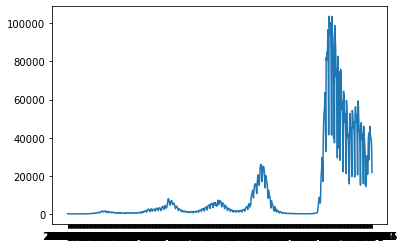

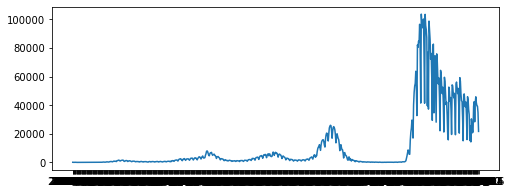

In [10]:
# サイズ指定せず図を書く
plt.plot(case)
plt.show()

# plotの前に次の記述をするとサイズ指定できる
plt.figure(figsize=(8,3))  ## figsize=(横幅, 縦幅) で図のサイズを指定（単位はインチ）
plt.plot(case)
plt.show()

### 軸ラベルを付ける
軸にラベルを付けることで，何を示しているグラフかが明確になる．  
`plt.xlabel(text)` および `plt.ylabel(text)` を使うと横軸と縦軸にラベルを付けられる．

また，`fontsize=12`のようなオプションをつけることでラベルのフォントサイズを指定することも可能（デフォルト値は大抵`10`，環境差あるかも）．

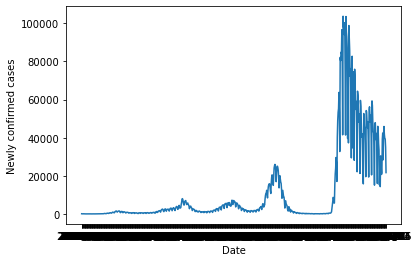

In [11]:
plt.xlabel('Date')       ## 横軸のラベルを指定
plt.ylabel('Newly confirmed cases')  ## 縦軸のラベルを指定

# plt.xlabel('date', fontsize=15)  ## 軸ラベルのフォントサイズを指定できる
# plt.ylabel('Newly confirmed cases', fontsize=15)

plt.plot(case)

### 軸の目盛りラベルを変える
軸の目盛りラベルが視認できると，データの分析が容易になる．

今回は日付が横軸になっているが，全ての日付が表示されているため重なって読めなくなってしまっている．  
この場合，目盛りラベルをもっと減らす必要がある．具体的には「2020/06」，「2020/09」などのように3ヶ月ごとの年と月を表示させるならば見やすくなるはずだ．

→`plt.xticks()`(あるいは`plt.yticks()`)を用いると，目盛りの間隔とラベルの形式を変更できる．

これは `plt.xticks(目盛りラベルを配置する場所のリスト, 目盛りラベルのリスト)` のように使用する(リスト以外の似たような形式にも対応)．

まずはデータの日付がいつからいつまでかを確認しよう．

In [12]:
merged_all_df

,New_Cases,Severe_Cases
Date,,
2020/5/9,108,267
2020/5/10,66,249
2020/5/11,58,243
2020/5/12,87,259
2020/5/13,55,245
...,...,...
2022/5/12,41657,156
2022/5/13,39582,153
2022/5/14,39339,139


2020年5月〜2022年5月までのデータが存在することが分かった．

これをふまえて，2020/06, 2020/09, 2020/12, 2021/03, ... , 2022/03 のように軸の目盛りラベルを設定する．

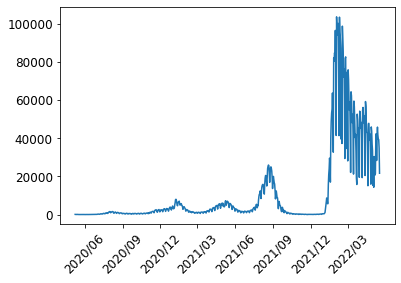

In [13]:
# データ上では日付が文字列になっていたので，年月日に分けられる形式に変更
merged_all_df.index = pd.to_datetime(merged_all_df.index)

# 目盛りラベルを配置するのは，各月の1日に相当する場所とする
tick_index = merged_all_df[pd.DatetimeIndex(merged_all_df.index).day == 1].index

# 目盛りラベルは内包表記を使って自力で生成
tick_labels = [f'2020/{i:02d}' for i in range(6, 12+1)] + \
              [f'2021/{i:02d}' for i in range(1, 12+1)] + \
              [f'2022/{i:02d}' for i in range(1, 5+1)]

"""
# データが今後増えていったとしても自動的にラベル生成できる書き方もある
merged_all_df['Year'] = pd.DatetimeIndex(merged_all_df.index).year
merged_all_df['Month'] = pd.DatetimeIndex(merged_all_df.index).month
merged_all_df['Day'] = pd.DatetimeIndex(merged_all_df.index).day

tick_index = merged_all_df[merged_all_df.Day == 1].index
case_YM_df = merged_all_df.loc[tick_index[0]:,:].groupby(['Year','Month'])['New_Cases'].sum()
tick_labels = case_YM_df.index
"""

# plt.xticks()に，目盛りラベルを配置する場所と目盛りラベル自体を渡す(その他にフォントサイズやラベルの回転角度等も指定できる)
plt.xticks(tick_index[::3], tick_labels[::3], fontsize=12, rotation=45)

# 縦軸の目盛りラベルは大きさ以外特に調整しない
plt.yticks(fontsize=12)

date = merged_all_df.index
plt.plot(date, case)

### それぞれの線に名前を付け，凡例を表示 → `plt.legend()`

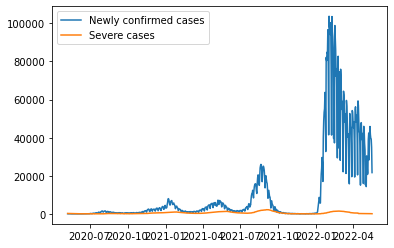

In [14]:
plt.plot(date, case,  label='Newly confirmed cases')
plt.plot(date, severe, label='Severe cases')
plt.legend()

### 線の色，種類，マーカー等を指定する

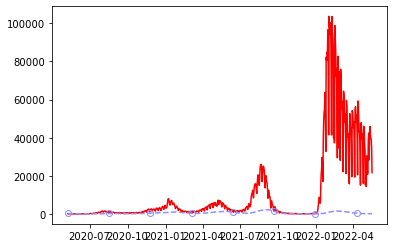

In [15]:
plt.plot(date, case, 
         color='r', ## 赤に設定
         ls='-',      ## 実線
        )
plt.plot(date, severe, 
         color='#9090ff', ## 色はrgb形式でも指定できる（頭に '#' が必要）
         ls='--',     ## 破線
         marker='o', markerfacecolor='None', markevery=100,  ## マーカーを×に，間隔を100ずつに
        )

### グリッド線を引く

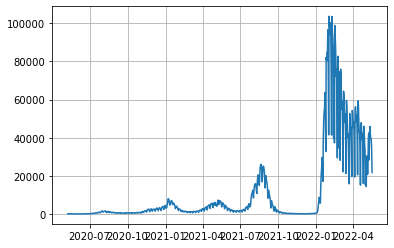

In [16]:
plt.grid()
# plt.grid(color='#bbbbbb', ls='--')    # 折れ線グラフと同様に線の色や種類を指定できる

plt.plot(date, case)

### タイトルを付ける

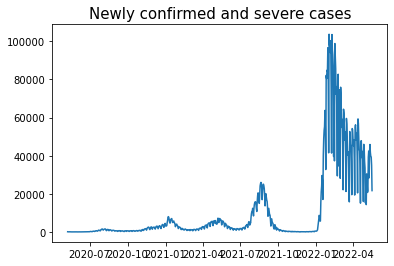

In [17]:
plt.title('Newly confirmed and severe cases', fontsize=15)

plt.plot(date, case)

### 全部まとめて

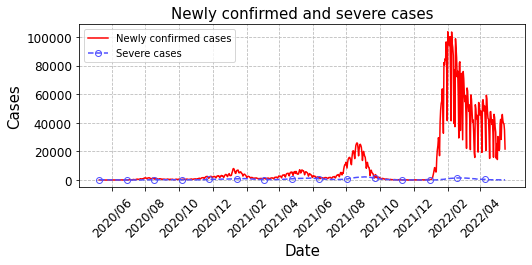

In [18]:
# サイズ指定
plt.figure(figsize=(8,3))

# 軸ラベル指定
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cases', fontsize=15)

# 軸の目盛りラベル指定
plt.xticks(tick_index[::2], tick_labels[::2], fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# 複数の線をプロットし，凡例をつける
plt.plot(date, case,  
         label='Newly confirmed cases', 
         color='r', ls='-')
plt.plot(date, severe, 
         label='Severe cases', 
         color='#5050ff', ls='--', marker='o', markerfacecolor='None', markevery=50)
plt.legend()

# グリッド線を引く
plt.grid(color='#bbbbbb', ls='--')

# タイトル指定
plt.title('Newly confirmed and severe cases', fontsize=15)

# 表示
plt.show()

## 棒グラフの調整

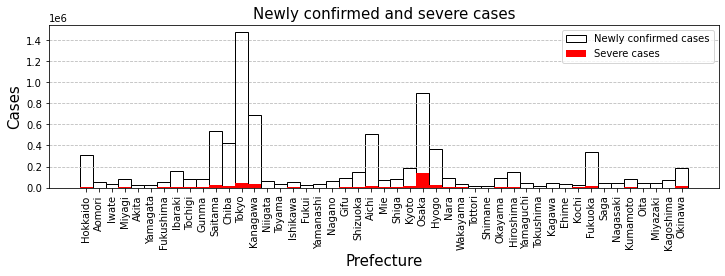

In [19]:
# グラフを横長にする
plt.figure(figsize=(12, 3))

# 軸ラベルを指定
plt.xlabel('Prefecture', fontsize=15)
plt.ylabel('Cases', fontsize=15)

# 横軸の目盛りラベルを90度回転させる
plt.xticks(rotation=90)

# グリッド線を引く
plt.grid(color='#bbbbbb', ls='--', axis='y')  # axis='y' とすることで縦軸のグリッドのみになる

# 棒の色，幅を指定する
plt.bar(prefs, pref_case,   # データを指定
        color='white', edgecolor='black',  # 塗りつぶしを白，枠線を黒に指定
        width=1.,  # 幅を1.0に指定（1.0だとちょうど隣の棒との幅がなくなる．小さくすると幅が広がる）
        label='Newly confirmed cases', 
       )

plt.bar(prefs, pref_severe, # データを指定
        color='red',    # 塗りつぶしを赤色に指定
        width=1.,  # 幅を1.0に指定
        label='Severe cases', 
       )
plt.legend()  # 凡例をつける

# タイトル指定
plt.title('Newly confirmed and severe cases', fontsize=15)

# 表示
plt.show()

## 散布図の調整

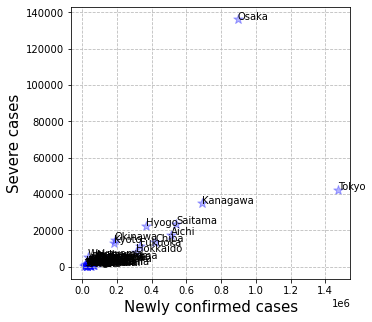

In [24]:
# グラフを正方形にする
plt.figure(figsize=(5, 5))

# 軸ラベルを指定
plt.xlabel('Newly confirmed cases', fontsize=15)
plt.ylabel('Severe cases', fontsize=15)

# グリッド線を引く
plt.grid(color='#bbbbbb', ls='--')

# 点の色・形などを指定する
plt.scatter(pref_case, pref_severe,  # データを指定
            c='blue', alpha=0.3, # 点の色を青，透明度を30%に指定
            marker='*',  # 形状を星型に
            s=100)   # サイズを100に

# 点にラベルをつける
for i, label in enumerate(prefs):
    plt.annotate(label, (pref_case[i], pref_severe[i]))

# 表示
plt.show()

# Matplotlib　応用編

以降では，グラフを横に並べたり，ヒートマップを使うなどといった，データをきれいに見せるためのより応用的なやり方を紹介する．

### 前提の話
matplotlibによるグラフ作成には2つの流儀がある．
1. MATLABスタイル：`plt.**plot`でグラフを作成
1. オブジェクト指向スタイル：`ax.**plot`でグラフを作成

今までは1の方法でやっていたが，以降はグラフの細かい調整をするため，2の方法で作図する．1と2の違いについては別動画を作成予定．

## 図を2つ横に並べる

### 基本のやり方
`fig, axes = plt.subplots(縦方向の分割数, 横方向の分割数)`を実行すると，`axes`に描画領域の配列がセットされる．

その後，`axes[0].plot(x, y)`のように書いてそれぞれの描画領域にグラフを描画することが可能．

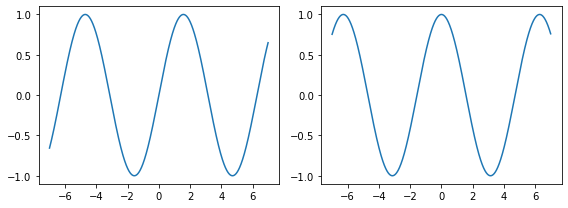

In [25]:
# サンプルデータとして三角関数を用いる
x = np.arange(-7, 7, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)

# 描画領域を横方向に2分割
fig, axes = plt.subplots(1, 2, figsize=(8,3))  # ついでにfigsizeも指定できる

axes[0].plot(x, y1)  # 描画領域の0番目（左）にy1のグラフを描画
axes[1].plot(x, y2)  # 描画領域の1番目（右）にy2のグラフを描画

plt.tight_layout()   # 図同士が被らないために必要

plt.show()

### それぞれの軸ラベルを決める
`plt.plot()`のように`matplotlib.pyplot`の関数を呼び出して作図する場合（1のMATLABスタイル）は，前半で紹介した`plt.xlabel()`等が使用できる．

一方で，2の`axes[0].plot()`などで作図する場合は，違う名前のメソッドを使わなくてはならないことに注意が必要．
軸ラベルを決めるのは，`axes[0].set_xlabel()`や`axes[0].set_ylabel()`である．

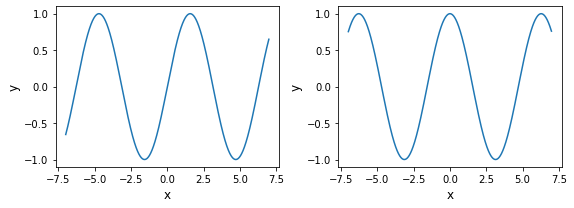

In [26]:
## 1行2列のグラフを用意
fig, axes = plt.subplots(1, 2, figsize=(8,3))

## axes[0] と axes[1] のそれぞれについて軸ラベルを設定
## （axes[0].xlabel() ではないことに注意！）
axes[0].set_xlabel('x', fontsize=12)  # axes[0] (左) のx軸ラベルを設定
axes[0].set_ylabel('y', fontsize=12)  # axes[0] (左) のy軸ラベルを設定
axes[1].set_xlabel('x', fontsize=12)  # axes[1] (右) のx軸ラベルを設定
axes[1].set_ylabel('y', fontsize=12)  # axes[1] (右) のy軸ラベルを設定

## それぞれプロット
axes[0].plot(x, y1)
axes[1].plot(x, y2)

plt.tight_layout()  # 図同士が被らないために必要

plt.show()

### 軸の最大・最小値，目盛りラベル，タイトルを指定する
異なるグラフを並べて表示する際には，それぞれに応じた軸の最大・最小値や目盛りラベル，そしてタイトルを設定する必要性が出てくる．

* 軸の最大・最小値 → `axes[0].set_xlim(最小値, 最大値)` などと書ける
* 軸の目盛り配置場所 → `axes[0].set_xticks(配置する場所のリスト)`
* 軸の目盛りラベル → `axes[0].set_xticklabels(ラベルのリスト)`
* タイトル → `axes[0].set_title(タイトル)`

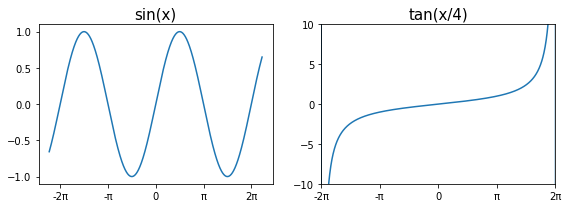

In [27]:
## 値域の異なる新たなデータを用意
y3 = np.tan(x/4)

## 1行2列のグラフを用意
fig, axes = plt.subplots(1, 2, figsize=(8,3))

## axes[1] (右) の描画範囲を正接関数用に設定
axes[1].set_xlim(-2*np.pi, 2*np.pi)
axes[1].set_ylim(-10, 10)

## 目盛りの配置場所・ラベルを設定
## x軸は左右両方で -2π, -π, 0, π, 2π を配置
axes[0].set_xticks(np.arange(-2*np.pi, 2*np.pi+.1, np.pi))
axes[0].set_xticklabels(['-2π', '-π', '0', 'π', '2π'])
axes[1].set_xticks(np.arange(-2*np.pi, 2*np.pi+.1, np.pi))
axes[1].set_xticklabels(['-2π', '-π', '0', 'π', '2π'])

## それぞれにタイトルを設定
axes[0].set_title('sin(x)', fontsize=15)
axes[1].set_title('tan(x/4)', fontsize=15)

## 描画
axes[0].plot(x, y1)
axes[1].plot(x, y3)

plt.tight_layout()  # 図同士が被らないために必要

plt.show()

## 図を2行3列で並べる
複数行，複数列に分割した図を作成することもできる．

この際，`plt.subplots()`が出力する描画領域配列 (`axes`) が2次元になるため，指定するためには `axes[1,0]` (2行目1列目の描画領域) のように記述する必要がある．

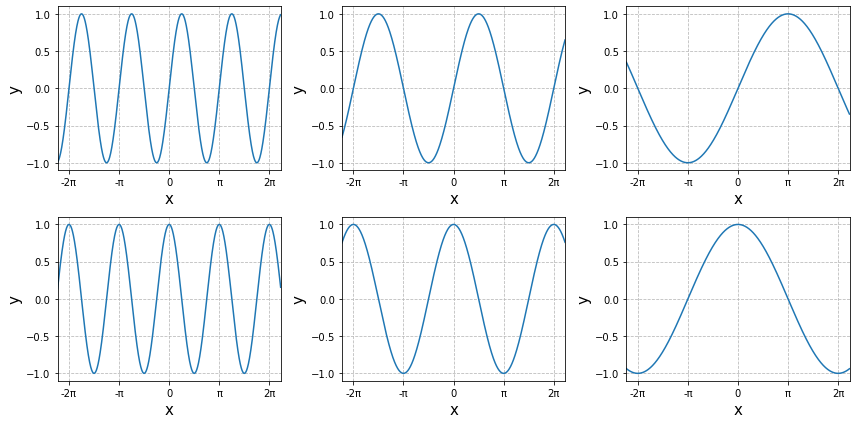

In [29]:
## 描画領域を2行3列に分割
fig, axes = plt.subplots(2, 3, figsize=(12,6))
    # このとき，axesは2行3列の配列形式になっている

## m行n列の，全ての描画領域に共通する設定を行う
for ax in axes.flatten():  # 多次元配列になっているaxesをnumpy の flatten() を用いて
                           # 1次元配列にしてからfor文へ
        
    ax.set_xlim(-7, 7)     # 横軸の範囲を-7〜7へ

    ax.set_xlabel('x', fontsize=15)   # 横軸のラベル指定
    ax.set_ylabel('y', fontsize=15)   # 縦軸のラベル指定

    ## 以下の2つで横軸の目盛りラベルを指定
    ax.set_xticks(np.arange(-2*np.pi, 2*np.pi+0.1, np.pi))
    ax.set_xticklabels(['-2π', '-π', '0', 'π', '2π'])

    ax.grid(color='#bbbbbb', ls='--') # グリッドを引く
        
## プロット
axes[0,0].plot(x, np.sin(2*x))   # (0,0)の描画領域（左上）に sin(2x) をプロット
axes[0,1].plot(x, np.sin(x))     # (0,1)の描画領域（中央上）に sin(x) をプロット
axes[0,2].plot(x, np.sin(x/2))   # (0,2)の描画領域（右上）に sin(x/2) をプロット

axes[1,0].plot(x, np.cos(2*x))   # (1,0)の描画領域（左上）に cos(2x) をプロット
axes[1,1].plot(x, np.cos(x))     # (1,1)の描画領域（中央上）に cos(x) をプロット
axes[1,2].plot(x, np.cos(x/2))   # (1,2)の描画領域（右上）に cos(x/2) をプロット

plt.tight_layout() # 図同士が被らないために必要

plt.show()

## 新型コロナウイルスのデータ表示へ応用
基本編でプロットした折れ線グラフでは重症者数が新規感染者数に対して極端に少なかったため，同時にプロットすると重症者数の変化が図から読み取りづらくなっていた．それを解決するための手段として上で紹介した描画領域の分割を用いる．

具体的には，グラフを上下に分割して上に新規感染者数，下に重症者数を表示することとする．

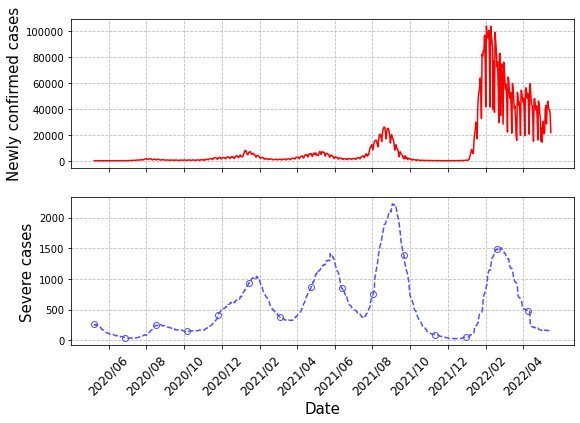

In [30]:
# サイズ指定
fig, ax = plt.subplots(2,1,figsize=(9,6))

# 横軸ラベル指定
ax[1].set_xlabel('Date', fontsize=15)
# 縦軸ラベル指定
ax[0].set_ylabel('Newly confirmed cases', fontsize=15)
ax[1].set_ylabel('Severe cases', fontsize=15)

# 軸の目盛りラベル指定
ax[0].set_xticks(tick_index[::2])
ax[0].set_xticklabels(['' for i in tick_index[::2]])
ax[1].set_xticks(tick_index[::2])
ax[1].set_xticklabels(tick_labels[::2], fontsize=12, rotation=45)

# 複数の線をプロットし，凡例をつける
ax[0].plot(date, case,  
         label='Newly confirmed cases', 
         color='r', ls='-')
ax[1].plot(date, severe, 
         label='Severe cases', 
         color='#5050ff', ls='--', marker='o', markerfacecolor='None', markevery=50)

# グリッド線を引く
ax[0].grid(color='#bbbbbb', ls='--')
ax[1].grid(color='#bbbbbb', ls='--')

# 表示
plt.show()

## ヒートマップ
2次元空間上の値を1枚の図で示す際にはヒートマップが使える．ここではそのやり方を紹介する．

### プロットには `imshow()` を使う

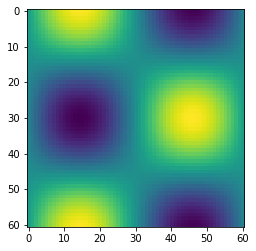

In [31]:
## ヒートマップで表示するためのデータを用意
x = np.linspace(-3, 3, 61)
y = np.linspace(-3, 3, 61)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)     # sin(x)cos(y) をプロットする

## ヒートマップは plt.imshow()でプロットできる
plt.imshow(Z)

### 上下を入れ替え，横軸と縦軸のラベル，目盛りのラベルを整える
デフォルト設定では左上が原点扱い (y軸が図の上から下に向かっている) ため，それを入れ替える．また，これまでと同様に軸ラベル等を設定する．

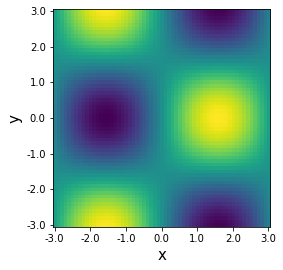

In [34]:
## 描画領域を設定
fig, ax = plt.subplots(1,1)

## 軸ラベルを設定
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

## 軸の目盛りを設定
ax.set_xticks(range(0,61,10))
ax.set_yticks(range(0,61,10))
ax.set_xticklabels(x[0::10])
ax.set_yticklabels(y[0::10])

## デフォルトではy軸が上から下に向いているが，originに'lower'を指定すると反転する
ax.imshow(Z, origin='lower')

### カラーマップを指定する
色と値の対応を示すカラーマップはさまざまな種類を指定することができる．

[ここ](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)のサイトに見本と名前が掲載されている．

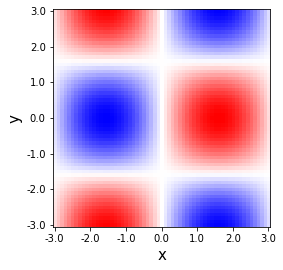

In [35]:
## 描画領域を設定
fig, ax = plt.subplots(1,1)

## 軸ラベルを設定
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

## 軸の目盛りを設定
ax.set_xticks(range(0,61,10))
ax.set_yticks(range(0,61,10))
ax.set_xticklabels(x[0::10])
ax.set_yticklabels(y[0::10])

## cmapにカラーマップを指定できる
ax.imshow(Z, origin='lower', cmap='bwr')

### カラーバーをつける
このままではどの色がどれほどの値か分からないため，それを示すカラーバーをつける必要がある．

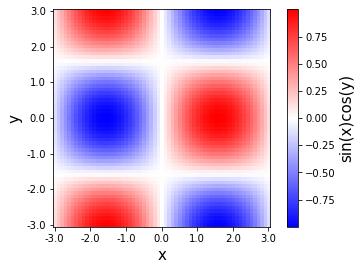

In [37]:
## 描画領域を設定
fig, ax = plt.subplots(1,1)

## 軸ラベルを設定
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

## 軸の目盛りを設定
ax.set_xticks(range(0,61,10))
ax.set_yticks(range(0,61,10))
ax.set_xticklabels(x[0::10])
ax.set_yticklabels(y[0::10])

## カラーマップを表示し，そのインスタンスをimとして受け取る
im = ax.imshow(Z, origin='lower', cmap='bwr')

## カラーマップの色と値を対応づけるカラーバーを表示
cbar = fig.colorbar(im, ax=ax)
## カラーバーにラベルをつける
cbar.set_label('sin(x)cos(y)', fontsize=15)

## 新規感染者データへ応用
カラーマップを使用することで新規感染者数の変化を各都道府県のそれぞれについて見ることが可能となる．

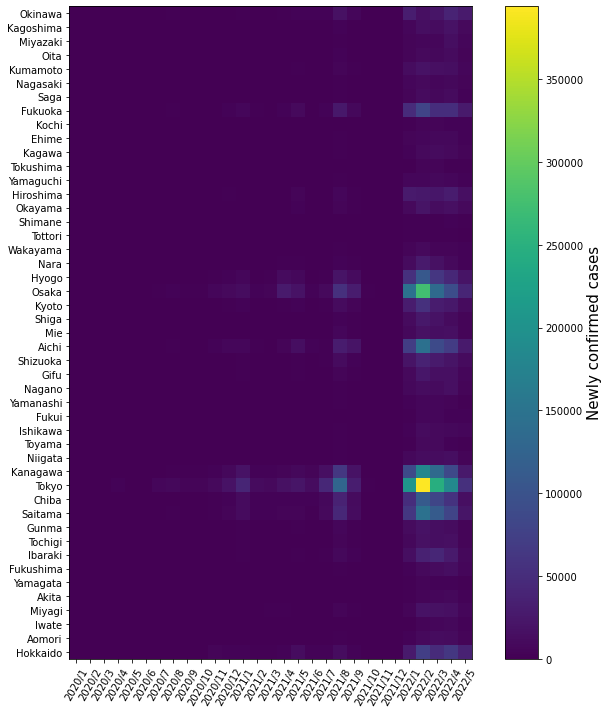

In [38]:
# 年月日情報を付ける
case_pref_df.index = pd.to_datetime(case_pref_df.index)
case_pref_df['Year'] = pd.DatetimeIndex(case_pref_df.index).year
case_pref_df['Month'] = pd.DatetimeIndex(case_pref_df.index).month

# 月ごとに合計を出す（グループ化することでその処理を行なっている）
month_case_pref_df = case_pref_df.groupby(['Year','Month']).sum()

# 年と月を使った横軸用のラベルを用意
x = [f'{y}/{m}' for y,m in month_case_pref_df.index.to_numpy()]

# 描画領域を設定
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 横軸の目盛りラベルを60度回転させる
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=60)

# 縦軸の目盛りラベルを設定
ax.set_yticks(range(len(prefs)))
ax.set_yticklabels(prefs)

# カラーマップをプロット
im = ax.imshow(month_case_pref_df.to_numpy().T, origin='lower')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Newly confirmed cases', fontsize=15)
    
# 表示
plt.show()